**Names:**

- Ryan Nicholas
- Justin Cheng

In [62]:
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import cloudscraper
import time
import multiprocessing

In [2]:
def scrape_urls(s):
    try:
        searched = s.find('div', {'id': 'search'})        
        articles = searched.find_all('a')
        urls = list(map(lambda x: x['href'], articles))
        titles = s.find_all('div', {'role': 'heading'})
        titles = list(map(lambda x: x.text, titles))
        time_diff = searched.find_all('span', class_='WG9SHc')
        time_diff = list(map(lambda x: x.text, time_diff))
        return urls, titles, time_diff
    except:
        return None, None, None

In [3]:
def get_news_text(t):
    text = t.find_all('p')
    text = list(map(lambda x: x.text, text))
    temp = ' '.join(text)
    return temp
    


GET a page from the internet for the "News"

In [4]:
# FB News On Google
url = 'https://www.google.com/search?q=FB+stock&source=lnms&tbm=nws&sa=X&ved=2ahUKEwiZ0KrV8dDvAhUbMVkFHTAGCLwQ_AUoAnoECAEQBA&biw=1848&bih=950'
header = {'USER-AGENT': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.2 Safari/605.1.15',
          'ACCEPT': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
          'ACCEPT-ENCODING': 'gzip, deflate, br',
          'ACCEPT-LANGUAGE': 'en-us'
         }
page = requests.get(url, headers=header)
soup = bs4.BeautifulSoup(page.content, 'html.parser')

Example on how to scrape the news:

ibm_product = soup.find('a', class_='subnav_heading')

ibm_product = ibm_product.text

ibm_product

In [5]:
urls, titles, t_diff = scrape_urls(soup)

In [6]:
print(titles)
print(t_diff)
urls

['Facebook Reminds Me Of Apple In 2012 With Its Potential', 'Facebook (FB) Stock Exceeds Past Two Weeks Value and Still Rises – Own Snap', "Why I'm Not Pouring My Savings Into Facebook Stock", "Options Traders See Upside For Facebook's Stock", 'Alphabet, Facebook (GOOG, FB) Drop After Warning on Digital Ad Growth', 'Where Will Facebook Stock Be In 10 Years: Likely A Lot Higher', 'Should You Be Buying Facebook Stock?', 'Facebook Stock Is Still an Absolute Bargain', 'Facebook Smashed Q1 Earnings. Why $400 Is the Next Stop for FB Stock.', "Is Facebook, Inc.'s (NASDAQ:FB) Latest Stock Performance A Reflection Of \nIts Financial Health?"]
['3 days ago', '15 hours ago', '1 week ago', '6 days ago', '2 weeks ago', '2 weeks ago', '2 weeks ago', '3 weeks ago', '4 weeks ago', '2 weeks ago']


['https://seekingalpha.com/article/4430751-facebook-reminds-me-of-apple-in-2012-with-its-potential',
 'https://ownsnap.com/facebook-fb-stock-exceeds-past-two-weeks-value-and-still-rises/',
 'https://www.fool.com/investing/2021/05/18/why-im-not-pouring-my-savings-into-facebook-stock/',
 'https://www.benzinga.com/markets/options/21/05/21222018/options-traders-see-upside-for-facebooks-stock',
 'https://www.bloomberg.com/news/articles/2021-05-10/alphabet-facebook-drop-as-citi-sounds-the-alarm-on-ad-growth',
 'https://seekingalpha.com/article/4427319-facebook-stock-in-10-years',
 'https://seekingalpha.com/article/4428153-should-you-be-buying-facebook-stock',
 'https://www.fool.com/investing/2021/05/03/facebook-stock-is-still-an-absolute-bargain/',
 'https://investorplace.com/hypergrowthinvesting/2021/04/fb-stock-facebook-smashed-q1-earnings/',
 'https://finance.yahoo.com/news/facebook-inc-nasdaq-fb-latest-082645334.html']

In [7]:
def get_soup_for_url(url):
    header = {'USER-AGENT': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.2 Safari/605.1.15',
          'ACCEPT': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
          'ACCEPT-ENCODING': 'gzip, deflate, br',
          'ACCEPT-LANGUAGE': 'en-us'
         }
    scraper = cloudscraper.create_scraper()
    page = scraper.get(url).text
    soup = bs4.BeautifulSoup(page, 'html.parser')
    return soup

t = get_soup_for_url(urls[0])


In [8]:
text = t.find_all('p')
text = list(map(lambda x: x.text, text))
temp = ' '.join(text)
temp

''

In [9]:
txt = []
for i in urls:
    s = get_soup_for_url(i)
    print(i)
    text = get_news_text(s)
    txt.append(text)
    time.sleep(2)
    
data = {
    'url': urls,
    'txt': txt
}

df = pd.DataFrame(data)
df

https://seekingalpha.com/article/4430751-facebook-reminds-me-of-apple-in-2012-with-its-potential
https://ownsnap.com/facebook-fb-stock-exceeds-past-two-weeks-value-and-still-rises/
https://www.fool.com/investing/2021/05/18/why-im-not-pouring-my-savings-into-facebook-stock/
https://www.benzinga.com/markets/options/21/05/21222018/options-traders-see-upside-for-facebooks-stock
https://www.bloomberg.com/news/articles/2021-05-10/alphabet-facebook-drop-as-citi-sounds-the-alarm-on-ad-growth
https://seekingalpha.com/article/4427319-facebook-stock-in-10-years
https://seekingalpha.com/article/4428153-should-you-be-buying-facebook-stock
https://www.fool.com/investing/2021/05/03/facebook-stock-is-still-an-absolute-bargain/
https://investorplace.com/hypergrowthinvesting/2021/04/fb-stock-facebook-smashed-q1-earnings/
https://finance.yahoo.com/news/facebook-inc-nasdaq-fb-latest-082645334.html


,url,txt
0,https://seekingalpha.com/article/4430751-faceb...,
1,https://ownsnap.com/facebook-fb-stock-exceeds-...,If you compare the beginning and end of this ...
2,https://www.fool.com/investing/2021/05/18/why-...,Returns as of 5/27/2021 Returns as of 5/27/202...
3,https://www.benzinga.com/markets/options/21/05...,Create your free account Already have an accou...
4,https://www.bloomberg.com/news/articles/2021-0...,"To continue, please click the box below to let..."
5,https://seekingalpha.com/article/4427319-faceb...,
6,https://seekingalpha.com/article/4428153-shoul...,\n To ensure this doesn’t happen in th...
7,https://www.fool.com/investing/2021/05/03/face...,Returns as of 5/27/2021 Returns as of 5/27/202...
8,https://investorplace.com/hypergrowthinvesting...,"\n\t\t\tCopyright © 2021 InvestorPlace Media, ..."
9,https://finance.yahoo.com/news/facebook-inc-na...,Facebook (NASDAQ:FB) has had a great run on th...


In [18]:
failed = get_soup_for_url(urls[4])
failed.context

'GOOG - Google Search(function(){window.google={kEI:\'JjOvYMuiG4_atAX5yYrQDA\',kEXPI:\'0,772215,1,6543,523777,56873,954,756,4348,207,2414,2390,2316,383,246,5,1354,4936,314,1122516,1197791,478,13,44,328941,8399,180,3382,3320,2044,314,1526,1770,1137,4795,5298,2488,328,5033,10931,278,1192,14923,7049,2445,3439,845,4693,10213,13149,1800,512,2111,4859,996,365,9290,448,2577,4743,8000,4841,4020,978,13228,2054,1793,3776,416,6430,1142,2792,448,12,866,12,5,7,9243,4517,2778,919,5081,62,823,708,1279,2212,530,149,1103,840,517,1466,213,4101,2112,1402,606,2023,1777,520,5766,257,6070,2577,3227,2845,7,4808,7546,5096,7876,3463,286,1180,108,1483,1924,908,2,940,2615,2397,10313,432,3,346,1244,1,820,1,1194,1355,2075,148,5991,5332,2652,4,1252,276,2304,1236,5803,74,1717,266,2627,491,1523,4067,730,6704,3824,3050,2658,4242,520,911,1684,30,3854,11366,713,638,37,7045,3770,5993,770,665,811,1334,3685,1,2526,992,1054,2048,2257,881,6,908,3,3541,1063,47,2,3063,1175,1,9360,1,1813,283,912,60,1,5931,1260,1,5493,432,552,47
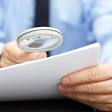

In [19]:
goog_url = 'https://www.google.com/search?q=GOOG&biw=1848&bih=446&tbm=nws&ei=TGBfYJVb9o_0_A-MnJLoDQ&oq=GOOG&gs_l=psy-ab.3..0i433k1l3j0j0i433k1j0l5.739.1997.0.2265.8.8.0.0.0.0.189.838.4j3.8.0....0...1c.1.64.psy-ab..0.7.831.0..0i10k1j0i3k1j0i433i131k1.113.S2CqpBDXp4c'
soup = get_soup_for_url(goog_url)
soup.text.encode().decode()

In [20]:
u, titles, t_diff2 = scrape_urls(soup)
print(titles)
print(t_diff2)
u

['Is Alphabet Inc. (GOOG) a Solid Growth Stock? 3 Reasons to Think " Yes "', 'Which Google Stock Is A Better Buy: GOOG Or GOOGL?', 'Returns At Alphabet (NASDAQ:GOOG.L) Appear To Be Weighed Down', 'Is Alphabet Inc Class C (GOOG) the Top Pick in the Internet Content & \nInformation Industry?', 'Alphabet (NASDAQ:GOOG.L) Has A Rock Solid Balance Sheet', 'Is Alphabet Inc. (GOOG) A Smart Long-Term Buy?', 'Noteworthy Tuesday Option Activity: GOOG, APD, GS', 'Alphabet Wins Earnings Season. Next, GOOG Stock Will Top $3,000.', 'Should You Buy Google Stock: Evaluating The Company On A Sum Of The Parts \nBasis', 'Alphabet: No Medium-Term Undervaluation']
['13 hours ago', '2 days ago', '1 day ago', '17 hours ago', '15 hours ago', '3 weeks ago', '1 day ago', '4 weeks ago', '2 weeks ago', '2 weeks ago']


['https://finance.yahoo.com/news/alphabet-inc-goog-solid-growth-164504642.html',
 'https://seekingalpha.com/article/4430928-which-google-stock-is-a-better-buy-goog-or-googl',
 'https://finance.yahoo.com/news/returns-alphabet-nasdaq-goog-l-065448593.html',
 'https://www.investorsobserver.com/news/stock-update/is-alphabet-inc-class-c-goog-the-top-pick-in-the-internet-content-information-industry',
 'https://simplywall.st/stocks/us/media/nasdaq-goog.l/alphabet/news/alphabet-nasdaqgoogl-has-a-rock-solid-balance-sheet',
 'https://finance.yahoo.com/news/alphabet-inc-goog-smart-long-165534065.html',
 'https://www.nasdaq.com/articles/noteworthy-tuesday-option-activity%3A-goog-apd-gs-2021-05-25',
 'https://investorplace.com/hypergrowthinvesting/2021/04/goog-stock-alphabet-won-earnings-season-googl-will-top-3000/',
 'https://seekingalpha.com/article/4428263-should-you-buy-google-stock-now',
 'https://seekingalpha.com/article/4428160-alphabet-no-medium-term-undervaluation']

In [21]:

for i in u:
    s = get_soup_for_url(i)
    print(i)
    text = get_news_text(s)
    txt.append(text)
    time.sleep(2)
urls = urls + u
data = {
    'url': urls,
    'txt': txt
}
data

https://finance.yahoo.com/news/alphabet-inc-goog-solid-growth-164504642.html
https://seekingalpha.com/article/4430928-which-google-stock-is-a-better-buy-goog-or-googl
https://finance.yahoo.com/news/returns-alphabet-nasdaq-goog-l-065448593.html
https://www.investorsobserver.com/news/stock-update/is-alphabet-inc-class-c-goog-the-top-pick-in-the-internet-content-information-industry
https://simplywall.st/stocks/us/media/nasdaq-goog.l/alphabet/news/alphabet-nasdaqgoogl-has-a-rock-solid-balance-sheet
https://finance.yahoo.com/news/alphabet-inc-goog-smart-long-165534065.html
https://www.nasdaq.com/articles/noteworthy-tuesday-option-activity%3A-goog-apd-gs-2021-05-25
https://investorplace.com/hypergrowthinvesting/2021/04/goog-stock-alphabet-won-earnings-season-googl-will-top-3000/
https://seekingalpha.com/article/4428263-should-you-buy-google-stock-now
https://seekingalpha.com/article/4428160-alphabet-no-medium-term-undervaluation


{'url': ['https://seekingalpha.com/article/4430751-facebook-reminds-me-of-apple-in-2012-with-its-potential',
  'https://ownsnap.com/facebook-fb-stock-exceeds-past-two-weeks-value-and-still-rises/',
  'https://www.fool.com/investing/2021/05/18/why-im-not-pouring-my-savings-into-facebook-stock/',
  'https://www.benzinga.com/markets/options/21/05/21222018/options-traders-see-upside-for-facebooks-stock',
  'https://www.bloomberg.com/news/articles/2021-05-10/alphabet-facebook-drop-as-citi-sounds-the-alarm-on-ad-growth',
  'https://seekingalpha.com/article/4427319-facebook-stock-in-10-years',
  'https://seekingalpha.com/article/4428153-should-you-be-buying-facebook-stock',
  'https://www.fool.com/investing/2021/05/03/facebook-stock-is-still-an-absolute-bargain/',
  'https://investorplace.com/hypergrowthinvesting/2021/04/fb-stock-facebook-smashed-q1-earnings/',
  'https://finance.yahoo.com/news/facebook-inc-nasdaq-fb-latest-082645334.html',
  'https://finance.yahoo.com/news/alphabet-inc-goog-

In [22]:
print(len(data['url']))

20


In [23]:
print(len(data['txt']))

20


In [24]:
df = pd.DataFrame(data)

In [25]:
df

,url,txt
0,https://seekingalpha.com/article/4430751-faceb...,
1,https://ownsnap.com/facebook-fb-stock-exceeds-...,If you compare the beginning and end of this ...
2,https://www.fool.com/investing/2021/05/18/why-...,Returns as of 5/27/2021 Returns as of 5/27/202...
3,https://www.benzinga.com/markets/options/21/05...,Create your free account Already have an accou...
4,https://www.bloomberg.com/news/articles/2021-0...,"To continue, please click the box below to let..."
5,https://seekingalpha.com/article/4427319-faceb...,
6,https://seekingalpha.com/article/4428153-shoul...,\n To ensure this doesn’t happen in th...
7,https://www.fool.com/investing/2021/05/03/face...,Returns as of 5/27/2021 Returns as of 5/27/202...
8,https://investorplace.com/hypergrowthinvesting...,"\n\t\t\tCopyright © 2021 InvestorPlace Media, ..."
9,https://finance.yahoo.com/news/facebook-inc-na...,Facebook (NASDAQ:FB) has had a great run on th...


In [26]:
t = ['Memorial FB falls short in season opener', 'FB Stock, GM, Disney Lead 5 Stocks Near Buy Points', 'Patriots Re-Sign RB James White and FB Jakob Johnson', 'Facebook (FB) Outpaces Stock Market Gains: What You Should Know', 'The Latest: South Carolina plans for fans at spring FB game', 'FB Roundup: Crown Resorts, Marriott International, Grosvenor ...', 'Facebook Inc (FB) COB and CEO Mark Zuckerberg Sold $14.7 million of Shares', 'Facebook Inc (FB) COB and CEO Mark Zuckerberg Sold $16.2 million of Shares', 'Facebook: The Best FAANG Stock To Buy', 'Louder Than Life 2021 tickets FB post |']
titles = t + titles
times = t_diff + t_diff2
data = {
    'url': urls,
    'txt': txt,
    'title': titles,
    'time': times
}
df1 = pd.DataFrame(data)
df1

,url,txt,title,time
0,https://seekingalpha.com/article/4430751-faceb...,,Memorial FB falls short in season opener,3 days ago
1,https://ownsnap.com/facebook-fb-stock-exceeds-...,If you compare the beginning and end of this ...,"FB Stock, GM, Disney Lead 5 Stocks Near Buy Po...",15 hours ago
2,https://www.fool.com/investing/2021/05/18/why-...,Returns as of 5/27/2021 Returns as of 5/27/202...,Patriots Re-Sign RB James White and FB Jakob J...,1 week ago
3,https://www.benzinga.com/markets/options/21/05...,Create your free account Already have an accou...,Facebook (FB) Outpaces Stock Market Gains: Wha...,6 days ago
4,https://www.bloomberg.com/news/articles/2021-0...,"To continue, please click the box below to let...",The Latest: South Carolina plans for fans at s...,2 weeks ago
5,https://seekingalpha.com/article/4427319-faceb...,,"FB Roundup: Crown Resorts, Marriott Internatio...",2 weeks ago
6,https://seekingalpha.com/article/4428153-shoul...,\n To ensure this doesn’t happen in th...,Facebook Inc (FB) COB and CEO Mark Zuckerberg ...,2 weeks ago
7,https://www.fool.com/investing/2021/05/03/face...,Returns as of 5/27/2021 Returns as of 5/27/202...,Facebook Inc (FB) COB and CEO Mark Zuckerberg ...,3 weeks ago
8,https://investorplace.com/hypergrowthinvesting...,"\n\t\t\tCopyright © 2021 InvestorPlace Media, ...",Facebook: The Best FAANG Stock To Buy,4 weeks ago
9,https://finance.yahoo.com/news/facebook-inc-na...,Facebook (NASDAQ:FB) has had a great run on th...,Louder Than Life 2021 tickets FB post |,2 weeks ago


In [27]:
def get_soup_from_search(company_name):
    url = 'https://www.google.com/search?q=' + company_name +'+stock&tbm=nws'
    soup = get_soup_for_url(url)
    return soup



In [30]:
cmpy = 'AAPL'

s = get_soup_from_search(cmpy)
temp1, temp2, t_diff3 = scrape_urls(s)

print(temp2)
print(t_diff3)
temp1

['Warren Buffett, Cathie Wood And Bill Gates Sell Apple Stock: Should You?', '3 Reasons Why Apple Stock May Finally Reach All-Time Highs', 'Institutional investors sell AAPL, fail to see four trends, says Morgan \nStanley', 'Top Grad Stocks 2021: An Apple Stock a Day Keeps the Losses Away', 'Apple Stock: What Could Make A Splash This Week', 'Buy Apple Before The Upcoming Breakout', "It's Time to Take Another Bite of Apple Stock", "Apple Stock Is Sliding. Here's What Investors Are Worried About.", 'AAPL After Hours: Apple Stock Nudged By Yields, MGM, Bitcoin', 'Apple Stock: How Long Should You Hold It?']
['19 hours ago', '1 day ago', '2 days ago', '1 day ago', '2 days ago', '1 week ago', '2 weeks ago', '3 weeks ago', '9 hours ago', '5 days ago']


['https://www.thestreet.com/apple/news/warren-buffett-cathie-wood-and-bill-gates-sell-apple-stock-should-you',
 'https://www.thestreet.com/apple/stock/3-reasons-why-apple-stock-may-finally-reach-all-time-highs',
 'https://9to5mac.com/2021/05/24/institutional-investors-sell-aapl-fail-to-see-four-trends-says-morgan-stanley/',
 'https://investorplace.com/2021/05/top-grad-stocks-2021-an-apple-stock-a-day-keeps-the-losses-away-aapl-stock/',
 'https://www.thestreet.com/apple/news/apple-stock-what-could-make-a-splash-this-week',
 'https://seekingalpha.com/article/4429656-buy-apple-before-the-upcoming-breakout',
 'https://investorplace.com/2021/05/aapl-stock-time-to-take-another-bite/',
 'https://www.barrons.com/articles/apple-stock-is-sliding-heres-what-investors-are-worried-about-51620146307',
 'https://www.thestreet.com/apple/stock/aapl-after-hours-apple-stock-yields-mgm-bitcoin',
 'https://www.thestreet.com/apple/stock/apple-stock-how-long-should-you-hold-it']

In [29]:
def get_soup_from_search_by_page(company_name, pg_num=1):
    num = (pg_num - 1) * 10
    url = 'https://www.google.com/search?q=' + company_name +'+stock&tbm=nws&start=' + str(num)
    soup = get_soup_for_url(url)
    return soup


In [31]:
# list of data to search for 
company_list = ['GOOG', 'FB', 'AAPL', 'GME', 'UBS', 'TSLA', 'AMZN', 'WMT', 'MSFT', 'BMBL']


In [32]:
import yfinance as yf

goog = yf.Ticker('GOOG')

goog.info

{'zip': '94043',
 'sector': 'Communication Services',
 'fullTimeEmployees': 139995,
 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. The company offers performance and brand advertising services. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, such as ads, Android, Chrome, hardware, Google Maps, Google Play, Search, and YouTube, as well as technical infrastructure; and digital content. The Google Cloud segment offers infrastructure and data analytics platforms, collaboration tools, and other services for enterprise customers. The Other Bets segment sells internet and TV services, as well as licensing and research and development services. The company was founded in 1998 and is headquartered in Mountain View, California.',
 'city': 'Mountain View',
 'phone': '650-253-0000',
 

In [33]:
goog.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-27,2336.000000,2337.449951,2304.270020,2307.120117,1598600,0,0
2021-04-28,2407.145020,2452.377930,2374.850098,2379.909912,2986400,0,0
2021-04-29,2410.330078,2436.520020,2402.280029,2429.889893,1977700,0,0
2021-04-30,2404.489990,2427.139893,2402.159912,2410.120117,1956700,0,0
2021-05-03,2402.719971,2419.699951,2384.500000,2395.169922,1689400,0,0
2021-05-04,2369.739990,2379.260010,2311.699951,2354.250000,1756000,0,0
2021-05-05,2368.419922,2382.199951,2351.409912,2356.739990,1090300,0,0
2021-05-06,2350.639893,2382.709961,2342.337891,2381.350098,1030900,0,0
2021-05-07,2400.000000,2416.409912,2390.000000,2398.689941,1163600,0,0


In [34]:
gh = goog.history()

prices = gh.Close
today = prices.iloc[-1]
last_week = prices.iloc[-6]
print(last_week)
today

2308.7099609375


2433.530029296875

In [35]:
delta = today - last_week
delta

124.820068359375

In [36]:
bmbl = yf.Ticker('BMBL')
bmbl_h = bmbl.history()
bmbl_h

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-27,60.290001,60.540001,58.810001,59.220001,1148700,0,0
2021-04-28,58.713001,62.900002,58.713001,62.599998,1142700,0,0
2021-04-29,62.889999,63.000000,59.270000,60.830002,711600,0,0
2021-04-30,59.777000,60.790001,59.450001,60.240002,878500,0,0
2021-05-03,60.439999,60.889999,58.130001,58.250000,1054500,0,0
2021-05-04,57.384998,57.750000,54.779999,55.270000,1414600,0,0
2021-05-05,57.060001,58.410000,55.759998,56.150002,1523200,0,0
2021-05-06,56.150002,56.720001,54.830002,55.709999,1221800,0,0
2021-05-07,55.880001,58.349998,55.230000,57.990002,939200,0,0


In [37]:
tckers = pd.read_csv('ticker_names.csv')
tckers

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$125.64,3.7400,3.068%,3.828220e+10,United States,1999.0,1441762,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$32.78,3.1200,10.519%,6.107609e+09,NaN,2016.0,9576083,Basic Industries,Aluminum
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.96,0.0900,0.912%,0.000000e+00,NaN,2021.0,158306,NaN,NaN
3,AACG,ATA Creativity Global American Depositary Shares,$4.92,0.9500,23.929%,1.542445e+08,China,NaN,5805582,Consumer Services,Other Consumer Services
4,AACQ,Artius Acquisition Inc. Class A Common Stock,$10.26,0.1900,1.887%,9.291712e+08,United States,2020.0,1437971,Basic Industries,Major Chemicals
...,...,...,...,...,...,...,...,...,...,...,...
7437,ZWRKU,Z-Work Acquisition Corp. Units,$10.0347,0.0747,0.75%,0.000000e+00,United States,2021.0,5030,Finance,Business Services
7438,ZWRKW,Z-Work Acquisition Corp. Warrant,$0.69,0.1001,16.969%,0.000000e+00,United States,2021.0,104439,Finance,Business Services
7439,ZYME,Zymeworks Inc. Common Shares,$32.21,-0.4500,-1.378%,1.486038e+09,Canada,2017.0,239166,Health Care,Major Pharmaceuticals
7440,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$4.62,-0.1400,-2.941%,1.905821e+08,United States,2015.0,1196513,Health Care,Major Pharmaceuticals


In [38]:
ticker_filtered = tckers.loc[tckers['Country'] == 'United States']
ticker_filtered = ticker_filtered[~ticker_filtered.Symbol.str.contains('\^')]
ticker_filtered = ticker_filtered[~ticker_filtered.Symbol.str.contains('/')]
ticker_lst = ticker_filtered.Symbol
ticker_lst

0           A
4        AACQ
5       AACQU
6       AACQW
7        AAIC
        ...  
7436      ZVO
7437    ZWRKU
7438    ZWRKW
7440     ZYNE
7441     ZYXI
Name: Symbol, Length: 5350, dtype: object

In [39]:
sectors = ticker_filtered.Sector
sectors

0           Capital Goods
4        Basic Industries
5        Basic Industries
6        Basic Industries
7       Consumer Services
              ...        
7436    Consumer Services
7437              Finance
7438              Finance
7440          Health Care
7441          Health Care
Name: Sector, Length: 5350, dtype: object

In [40]:
nan_val = tckers.Sector[2]
nan_val

nan

In [41]:
less_val = ticker_lst[0:360]

In [42]:
ticker_lst

0           A
4        AACQ
5       AACQU
6       AACQW
7        AAIC
        ...  
7436      ZVO
7437    ZWRKU
7438    ZWRKW
7440     ZYNE
7441     ZYXI
Name: Symbol, Length: 5350, dtype: object

In [43]:
less_val

0          A
4       AACQ
5      AACQU
6      AACQW
7       AAIC
       ...  
499     ARAY
500     ARBG
501    ARBGU
502    ARBGW
503      ARC
Name: Symbol, Length: 360, dtype: object

In [90]:
urls = []
time_period = []
txt = []
title = []
label = []
t_value = []
s_value = []
count = 0

In [68]:
count = 0

In [69]:
index = less_val.index
index

Int64Index([  0,   4,   5,   6,   7,  10,  11,  12,  13,  14,
            ...
            490, 491, 495, 496, 498, 499, 500, 501, 502, 503],
           dtype='int64', length=360)

In [104]:

for i in less_val:
    print(count * 100 / len(less_val))
    try:
        sec = sectors[index[count]]
        count += 1
        stock_info = yf.Ticker(i)
        stock_history = stock_info.history()

        if sec != nan_val and len(stock_history) >= 6:
            # loop through the list of tickers 
            # parse the news for information on the stock 
            soup = None
            p = multiprocessing.Pool(1)
            soup = p.map(get_soup_from_search, i)[0]
            
            time.sleep(7)
            
            if soup is None:
                # terminate method if lasted too long
                p.terminate()
                # keep main going
                p.join()
                
            print('Got Soup')
            # get the url links, the title, and the date posted 
#             u_vals, tit, t_period = p.map(scrape_urls, soup)
            p = multiprocessing.Pool(1)
            vals = p.map(scrape_urls, soup)
    
            u_vals, tit, t_period = vals[1]
            
        
            
            time.sleep(2)
            
            
            if u_vals is None:
                p.terminate()
                p.join()
            
#             print(u_vals)
            # append to the list for the df 
            urls = urls + u_vals
            title = title + tit
            time_period = time_period + t_period
            # get the change in price - Will filter out to only get information for a "weeks" worth of data

            prices = stock_history.Close
            today = prices.iloc[-1]
            last_week = prices.iloc[-6]
            delta_price = today - last_week


            # get the news (text in the article)
            u_soup = None
            p = multiprocessing.Pool()

            u_soup = p.map(get_soup_for_url, u_vals)

            time.sleep(7)

#             print(u_soup)

            if u_soup is None:
                # terminate method if lasted too long
                p.terminate()
                # keep main going
                p.join()

            news_info = None

            p = multiprocessing.Pool()

            news_info = p.map(get_news_text, u_soup)

            time.sleep(2)

            if news_info is None:
                # terminate method if lasted too long
                p.terminate()
                # keep main going
                p.join()

            txt.append(news_info)
            label.append(delta_price)
            t_value.append(i)
            s_value.append(sec)
    except Exception as e:
#         print(str(e))
#         raise e
        print('Could not access: ', i)
        diff = len(urls) - len(t_value)
        for z in range(diff):
            txt.append('')
            t_value.append('')
            s_value.append('')
            label.append(0)
    time.sleep(2)
    

        

4.166666666666667
Got Soup
Could not access:  A
4.444444444444445
Got Soup
Could not access:  AACQ
4.722222222222222
Got Soup
Could not access:  AACQU
5.0


Process ForkPoolWorker-149:
Process ForkPoolWorker-148:
Process ForkPoolWorker-150:
Process ForkPoolWorker-142:
Traceback (most recent call last):
Process ForkPoolWorker-144:
Process ForkPoolWorker-143:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-145:
Process ForkPoolWorker-151:
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()


KeyboardInterrupt: 

  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/usr/lib/python3.8/multip

In [58]:
c = np.unique(t_value)
len(c)

58

In [60]:
print(len(urls))
print(len(txt))
print(len(title))
print(len(time_period))
print(len(t_value))
print(len(s_value))
print(len(label))

big_val = len(urls)
small_vals = len(txt)

diff = big_val - small_vals
for i in range(diff):
    txt.append('')
    t_value.append('')
    s_value.append('')
    label.append(0)
    
diff2 = big_val - len(label)

for i in range(diff2):
    label.append(0)

725
725
725
725
725
725
335


In [61]:
data = {
    'url': urls,
    'txt': txt,
    'title': title,
    'time': time_period,
    'ticker': t_value,
    'sector': s_value,
    'price_change': label
}

stock_df = pd.DataFrame(data)


ValueError: arrays must all be same length

In [ ]:
stock_df.to_csv('stock_info_improved.csv', index=False, header=True)